In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Creating the dataset

In [39]:

data = {
    'HouseSize': [800, 1200, 2000, 2500, 3000, 4000, 5000, 6000, 8000],
    'HousePrice': [10, 20, 30, 50, 80, 100, 150, 300, 400]
}

df = pd.DataFrame(data)

## Extract features and target

In [40]:

X = df[['HouseSize']]  # Feature matrix
y = df['HousePrice']   # Target vector


## Train-test split (80% train, 20% test)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scatter plot of the data


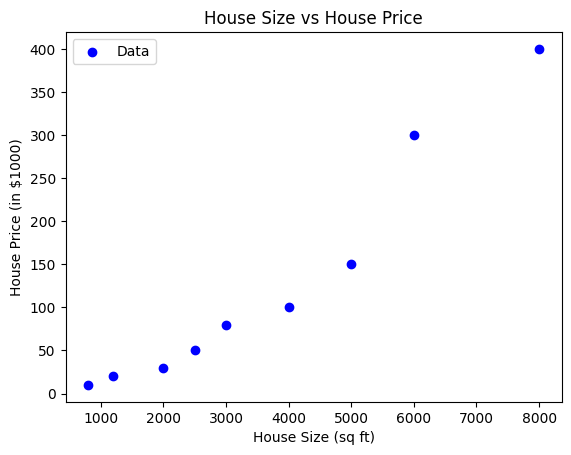

In [42]:
plt.scatter(df['HouseSize'], df['HousePrice'], color='blue', label='Data')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (in $1000)')
plt.title('House Size vs House Price')
plt.legend()
plt.show()

##OLS Model

In [43]:
# --------------------------------------------------
# Scikit-learn Linear Regression (OLS)
# --------------------------------------------------
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)  # Fit the model on the training data

LinearRegression()

## Predictions for training and testing sets

In [44]:

y_pred_train_ols = ols_model.predict(X_train)
y_pred_test_ols = ols_model.predict(X_test)

## Get coefficients

In [45]:

m_sklearn_ols = ols_model.coef_[0]
c_sklearn_ols = ols_model.intercept_
print(f"Scikit-learn OLS Results: m = {m_sklearn_ols:.4f}, c = {c_sklearn_ols:.4f}")

Scikit-learn OLS Results: m = 0.0544, c = -79.4401


## Calculate evaluation metrics for OLS (Train and Test)

In [46]:

mse_train_ols = mean_squared_error(y_train, y_pred_train_ols)
rmse_train_ols = np.sqrt(mse_train_ols)
r2_train_ols = r2_score(y_train, y_pred_train_ols)

mse_test_ols = mean_squared_error(y_test, y_pred_test_ols)
rmse_test_ols = np.sqrt(mse_test_ols)
r2_test_ols = r2_score(y_test, y_pred_test_ols)

print(f"OLS Train Evaluation: MSE = {mse_train_ols:.4f}, RMSE = {rmse_train_ols:.4f}, R² = {r2_train_ols:.4f}")
print(f"OLS Test Evaluation: MSE = {mse_test_ols:.4f}, RMSE = {rmse_test_ols:.4f}, R² = {r2_test_ols:.4f}")


OLS Train Evaluation: MSE = 1055.8475, RMSE = 32.4938, R² = 0.9305
OLS Test Evaluation: MSE = 1993.4821, RMSE = 44.6484, R² = 0.8983


## Plot OLS result

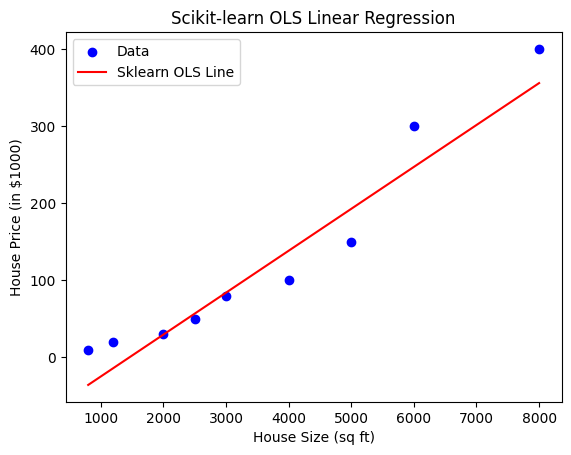

In [47]:

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, ols_model.predict(X), color='red', label='Sklearn OLS Line')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (in $1000)')
plt.title('Scikit-learn OLS Linear Regression')
plt.legend()
plt.show()

## GradientDescent model

In [48]:
# --------------------------------------------------
# Scikit-learn SGDRegressor (Gradient Descent)
# --------------------------------------------------
# Standardizing features for SGDRegressor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* max_iter: Maximum number of iterations for convergence.
* tol: Stopping tolerance.
* eta0: Initial learning rate.

In [49]:
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.001, random_state=42)
sgd_model.fit(X_train_scaled, y_train)

SGDRegressor(eta0=0.001, learning_rate='constant', random_state=42)

In [50]:
# max_iter=1000

# What it does: Sets the maximum number of iterations (epochs) over the training data. An epoch means processing the entire dataset once.
# Why it's important: Gradient descent is an iterative process, and this parameter ensures the algorithm doesn’t run indefinitely.
# tol=1e-3

# What it does: Sets the stopping criterion for convergence. If the change in the cost function (loss) between consecutive iterations is smaller than tol, the optimization stops.
# Why it's important: Prevents unnecessary iterations when the model has already converged.
# learning_rate='constant'

# What it does: Specifies how the learning rate (step size) is adjusted during training.
# Available options:
# 'constant': Keeps the learning rate fixed.
# 'optimal': Adapts the learning rate based on the iteration and training set size.
# 'invscaling': Decreases the learning rate as more iterations are performed.
# 'adaptive': Reduces the learning rate when training loss stops improving.
# Why it's important: Controls how fast or slow the parameters are updated.
# eta0=0.001

# What it does: Sets the initial learning rate when learning_rate='constant'.
# Why it's important: Determines the step size for parameter updates. Smaller values ensure stable convergence but might take longer, while larger values speed up convergence but risk overshooting the minimum.

# random_state=42

# What it does: Sets the seed for the random number generator, ensuring reproducibility of the results.
# Why it's important: Stochastic Gradient Descent introduces randomness in the order of training data and parameter initialization. Fixing random_state ensures consistent results across runs.


## Predictions for training and testing sets

In [51]:

y_pred_train_gd = sgd_model.predict(X_train_scaled)
y_pred_test_gd = sgd_model.predict(X_test_scaled)

## Get Coeffs

In [54]:
m_sklearn_gd = sgd_model.coef_
c_sklearn_gd = sgd_model.intercept_

print("coeff: ", m_sklearn_gd)
print("interce: ", c_sklearn_gd)


coeff:  [118.65591075]
interce:  [116.91379805]


### Calculate evaluation metrics for Gradient Descent (Train and Test)


In [55]:

mse_train_gd = mean_squared_error(y_train, y_pred_train_gd)
rmse_train_gd = np.sqrt(mse_train_gd)
r2_train_gd = r2_score(y_train, y_pred_train_gd)

mse_test_gd = mean_squared_error(y_test, y_pred_test_gd)
rmse_test_gd = np.sqrt(mse_test_gd)
r2_test_gd = r2_score(y_test, y_pred_test_gd)

print(f"SGD Train Evaluation: MSE = {mse_train_gd:.4f}, RMSE = {rmse_train_gd:.4f}, R² = {r2_train_gd:.4f}")
print(f"SGD Test Evaluation: MSE = {mse_test_gd:.4f}, RMSE = {rmse_test_gd:.4f}, R² = {r2_test_gd:.4f}")


SGD Train Evaluation: MSE = 1055.9571, RMSE = 32.4955, R² = 0.9305
SGD Test Evaluation: MSE = 2018.4211, RMSE = 44.9268, R² = 0.8970


## Plot SGD result

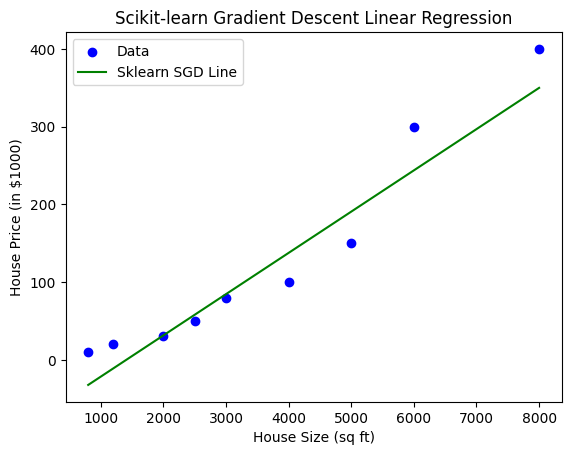

In [56]:

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, sgd_model.predict(X_scaled), color='green', label='Sklearn SGD Line')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (in $1000)')
plt.title('Scikit-learn Gradient Descent Linear Regression')
plt.legend()
plt.show()

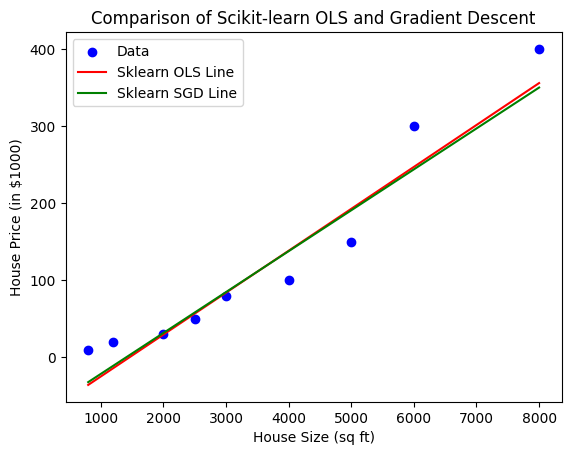

In [57]:

# --------------------------------------------------
# Combined Plot
# --------------------------------------------------
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, ols_model.predict(X), color='red', label='Sklearn OLS Line')
plt.plot(X, sgd_model.predict(X_scaled), color='green', label='Sklearn SGD Line')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (in $1000)')
plt.title('Comparison of Scikit-learn OLS and Gradient Descent')
plt.legend()
plt.show()


In [58]:
# --------------------------------------------------
# Comparison of Metrics
# --------------------------------------------------
metrics_comparison = pd.DataFrame({
    'Model': ['OLS', 'SGD'],
    'Train MSE': [mse_train_ols, mse_train_gd],
    'Test MSE': [mse_test_ols, mse_test_gd],
    'Train RMSE': [rmse_train_ols, rmse_train_gd],
    'Test RMSE': [rmse_test_ols, rmse_test_gd],
    'Train R²': [r2_train_ols, r2_train_gd],
    'Test R²': [r2_test_ols, r2_test_gd]
})

print("\nComparison of Metrics:")
print(metrics_comparison)


Comparison of Metrics:
  Model    Train MSE     Test MSE  Train RMSE  Test RMSE  Train R²   Test R²
0   OLS  1055.847539  1993.482058   32.493808  44.648427  0.930499  0.898292
1   SGD  1055.957107  2018.421129   32.495494  44.926842  0.930492  0.897019




Here is a summary of the **metrics**:

### **OLS (Ordinary Least Squares) Model:**
- **Train MSE (Mean Squared Error)**: 1055.85
- **Test MSE**: 1993.48
- **Train RMSE (Root Mean Squared Error)**: 32.49
- **Test RMSE**: 44.65
- **Train R² (Coefficient of Determination)**: 0.9305
- **Test R²**: 0.8983

### **SGD (Stochastic Gradient Descent) Model:**
- **Train MSE**: 1055.96
- **Test MSE**: 2018.42
- **Train RMSE**: 32.50
- **Test RMSE**: 44.93
- **Train R²**: 0.9305
- **Test R²**: 0.8970

---

### **Interpretation**:

1. **MSE & RMSE**:
   - The **MSE** and **RMSE** values are almost identical for both models. This means that both models perform similarly in terms of the average squared error and the root of the squared error.
   - OLS has slightly lower values for both MSE and RMSE compared to SGD on both training and testing sets, but the difference is minimal.

2. **R² (Coefficient of Determination)**:
   - **R²** values are very close for both models:
     - OLS: 0.9305 (train), 0.8983 (test)
     - SGD: 0.9305 (train), 0.8970 (test)
   - **R²** represents how well the model explains the variability of the target variable. Both models explain about **93%** of the variability in the training data and about **89%** of the variability in the test data.
   - The slight difference in test R² between OLS and SGD is minimal, meaning both models generalize quite similarly to the test data.

---

### **Conclusion**:
- **OLS** and **SGD** models perform almost equally well on this dataset. The difference in metrics is very small, indicating that both models have found nearly identical parameter estimates for the simple linear regression problem.
- **OLS** is the direct analytical solution, and **SGD** is an iterative method, but for this small dataset, both methods provide very similar results.

This comparison shows that for simple linear regression, both approaches yield similar accuracy and error metrics, but OLS is usually preferred for its simplicity and direct solution. SGD, on the other hand, is useful when dealing with larger datasets or when computational resources are constrained.